# Laboratorio 2 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [309]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

from skimage.filters import threshold_niblack
from skimage import morphology as mo
from skimage.measure import regionprops

## 1. Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la localización de uno (o varios) objetos específicos dentro de una imagen binaria I. 

In [310]:
# Función para dibujar un cuadrado de 3x3 píxeles
def dibujar_cuadrado(img, centro):
    tamaño = 1  # tamaño de 1 para que el cuadrado sea de 3x3 píxeles
    pts = np.array([[centro[0] - tamaño, centro[1] - tamaño],
                    [centro[0] + tamaño, centro[1] - tamaño],
                    [centro[0] + tamaño, centro[1] + tamaño],
                    [centro[0] - tamaño, centro[1] + tamaño]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv.fillPoly(img, [pts], 255)

In [311]:
# Función para dibujar una cruz de 3 píxeles de alto y 3 píxeles de ancho
def dibujar_cruz(img, centro):
    tamaño = 1  # tamaño de 1 para que la cruz sea de 3 píxeles de alto y 3 píxeles de ancho
    cv.line(img, (centro[0] - tamaño, centro[1]), (centro[0] + tamaño, centro[1]), 255, 1)
    cv.line(img, (centro[0], centro[1] - tamaño), (centro[0], centro[1] + tamaño), 255, 1)

In [312]:
# Crear una imagen en blanco de 20x20 píxeles
imagen = np.zeros((20, 20), dtype=np.uint8)

# Dibujar objetos aleatorios
np.random.seed(42)
for _ in range(10):
    centro = (np.random.randint(3, 17), np.random.randint(3, 17))  # Ajustar para evitar bordes
    forma = np.random.choice(['cuadrado', 'cruz'])
    if forma == 'cuadrado':
        dibujar_cuadrado(imagen, centro)
    elif forma == 'cruz':
        dibujar_cruz(imagen, centro)

In [313]:
# Definir el elemento estructurante para la operación hit or miss (forma de cuadrado 3x3)
elemento_estructurante = np.array([[0, 0, 0, 0, 0],
                                   [0, 1, 1, 1, 0],
                                   [0, 1, 1, 1, 0],
                                   [0, 1, 1, 1, 0],
                                   [0, 0, 0, 0, 0]], dtype=np.uint8)

In [314]:
# Aplicar la operación hit or miss
imagen_hit_or_miss = cv.morphologyEx(imagen, cv.MORPH_HITMISS, elemento_estructurante)

# Crear una copia del elemento estructurante y rellenarla con ceros hasta que sea del tamaño de la imagen original
elemento_estructurante_ampliado = np.zeros_like(imagen)
elemento_estructurante_ampliado[7:12, 7:12] = elemento_estructurante

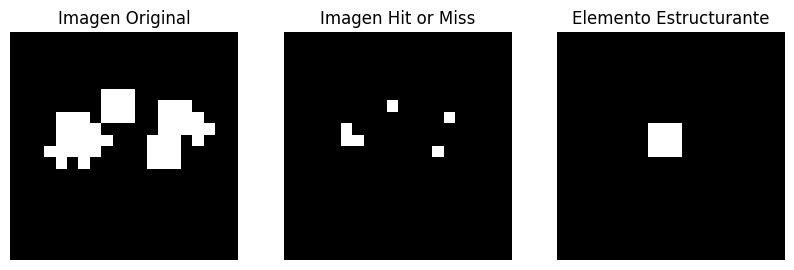

In [315]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen Hit or Miss')
plt.imshow(imagen_hit_or_miss, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Elemento Estructurante')
plt.imshow(elemento_estructurante_ampliado, cmap='gray')
plt.axis('off')

plt.show()

## 2. Consideramos de nuevo la imagen rice.jpg. Hacer lo siguiente

In [316]:
image_path = 'assets/rice.jpg'
image = plt.imread(image_path)
image_original = image

In [317]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

### a) Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local

#### Segmentación binaria

In [318]:
threshold = threshold_niblack(image, window_size=51, k=-0.48)
image = image > threshold

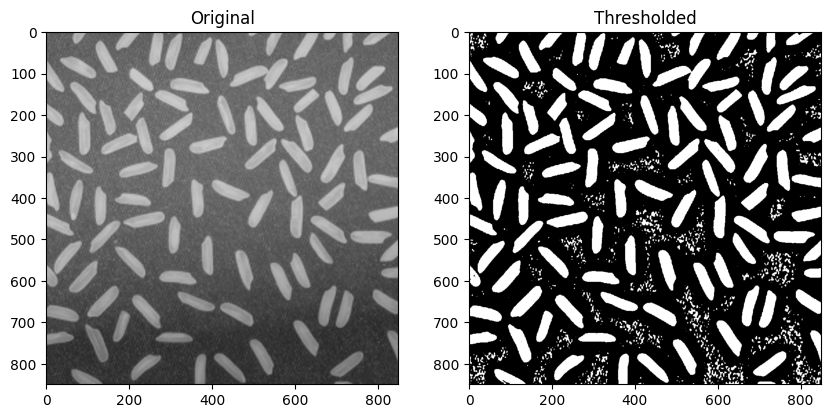

In [319]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.title("Thresholded")
plt.show()

### b) Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar por qué está eligiendo estas transformaciones morfológicas.

In [320]:
disk = mo.disk(5)
image = mo.binary_opening(image, disk)

In [321]:
disk = mo.disk(1)
image = mo.binary_erosion(image, disk)

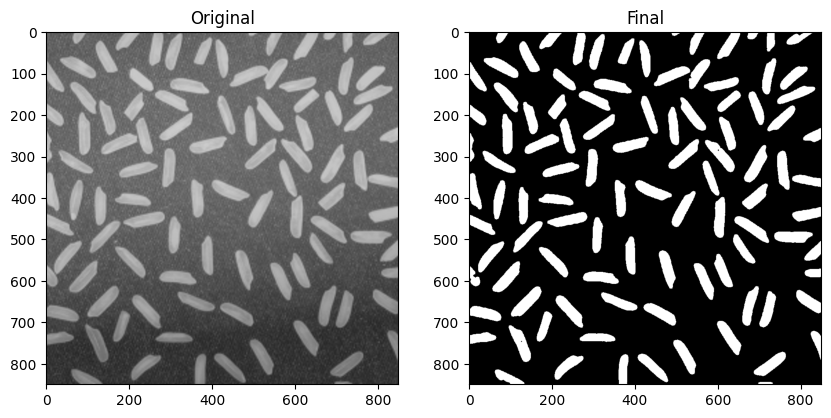

In [322]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.title("Final")
plt.show()

### c) Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen 

In [323]:
C, M = mo.label(image, background=0, return_num=True, connectivity=2)

In [324]:
print("Number of grains:", M)

Number of grains: 100


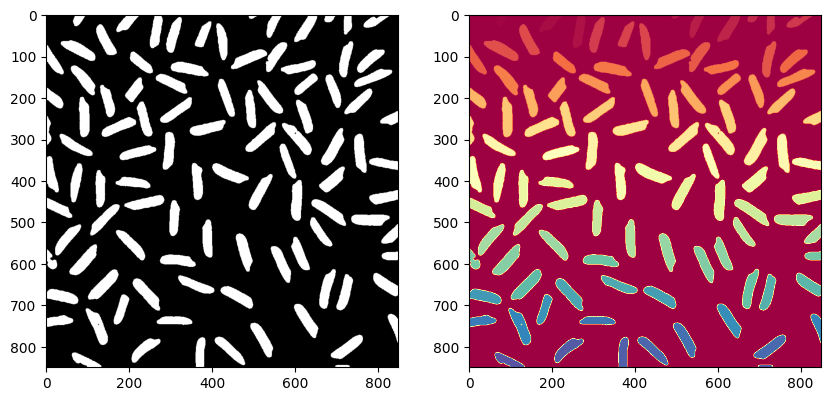

In [325]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(C, plt.cm.Spectral)
plt.show()

## 4. Obtener el gradiente morfológico de la imagen brain-scan.jpeg. Explicar cuál es el resultado obtenido y explicar por qué se le llama gradiente. 

In [326]:

def plot_image(original, dilated, eroded, gradient):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plt.title('Imagen Original')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Imagen Dilatada')
    plt.imshow(dilated, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Imagen Erosionada')
    plt.imshow(eroded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Gradiente Morfológico')
    plt.imshow(gradient, cmap='gray')
    plt.axis('off')

    plt.show()

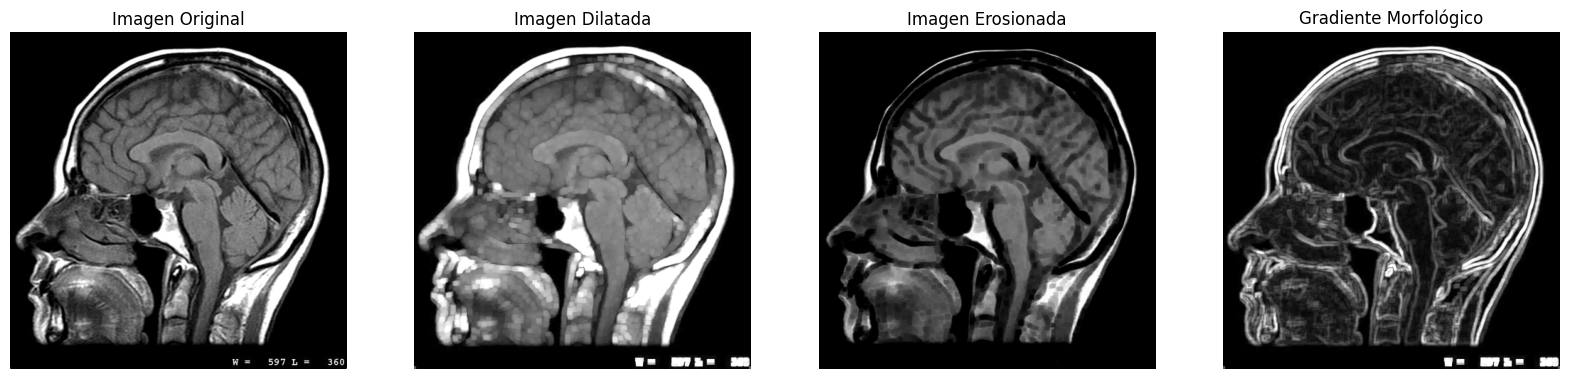

In [327]:
imagen = cv.imread('assets/brain-scan.jpeg', cv.IMREAD_GRAYSCALE)
elemento_estructurante = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
imagen_dilatada = cv.dilate(imagen, elemento_estructurante)
imagen_erosionada = cv.erode(imagen, elemento_estructurante)
gradiente_morfologico = cv.subtract(imagen_dilatada, imagen_erosionada)
plot_image(imagen, imagen_dilatada, imagen_erosionada, gradiente_morfologico)

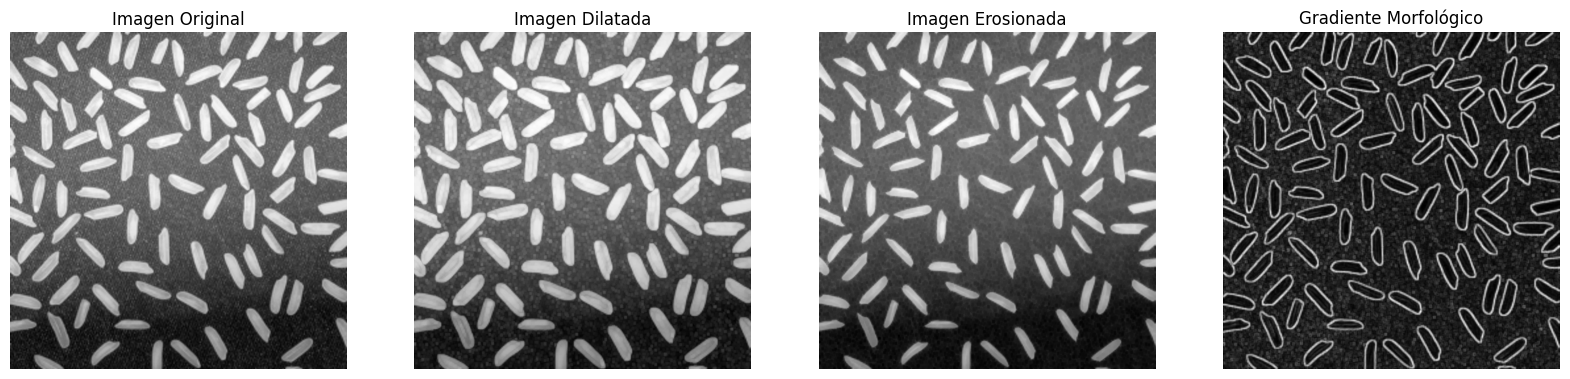

In [328]:
imagen = cv.imread('assets/rice.jpg', cv.IMREAD_GRAYSCALE)
elemento_estructurante = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
imagen_dilatada = cv.dilate(imagen, elemento_estructurante)
imagen_erosionada = cv.erode(imagen, elemento_estructurante)
gradiente_morfologico = cv.subtract(imagen_dilatada, imagen_erosionada)
plot_image(imagen, imagen_dilatada, imagen_erosionada, gradiente_morfologico)

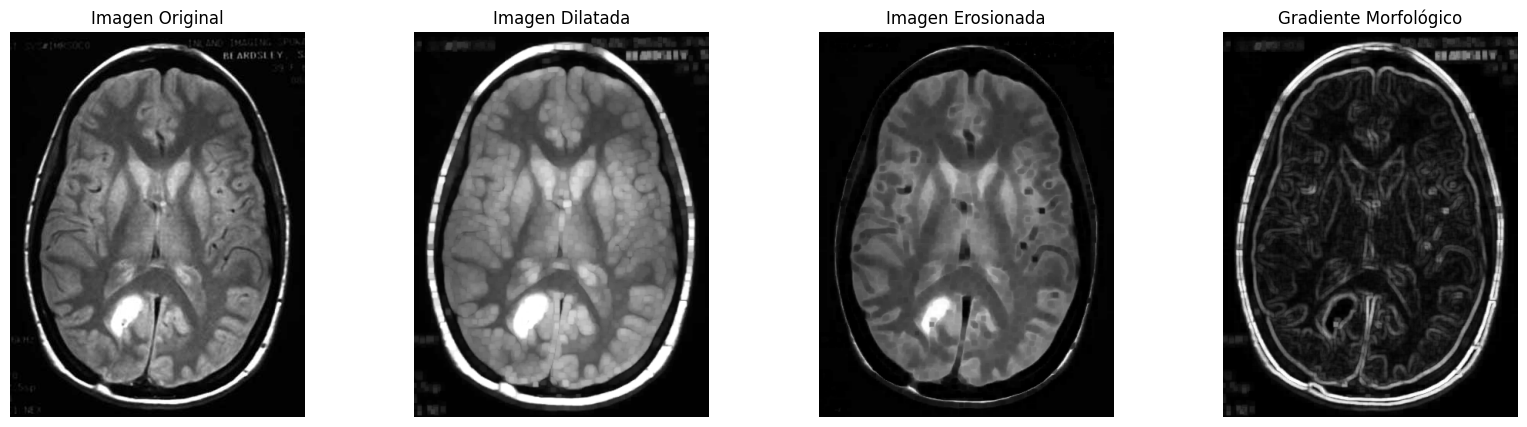

In [329]:
imagen = cv.imread('assets/brain.jpg', cv.IMREAD_GRAYSCALE)
elemento_estructurante = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
imagen_dilatada = cv.dilate(imagen, elemento_estructurante)
imagen_erosionada = cv.erode(imagen, elemento_estructurante)
gradiente_morfologico = cv.subtract(imagen_dilatada, imagen_erosionada)
plot_image(imagen, imagen_dilatada, imagen_erosionada, gradiente_morfologico)

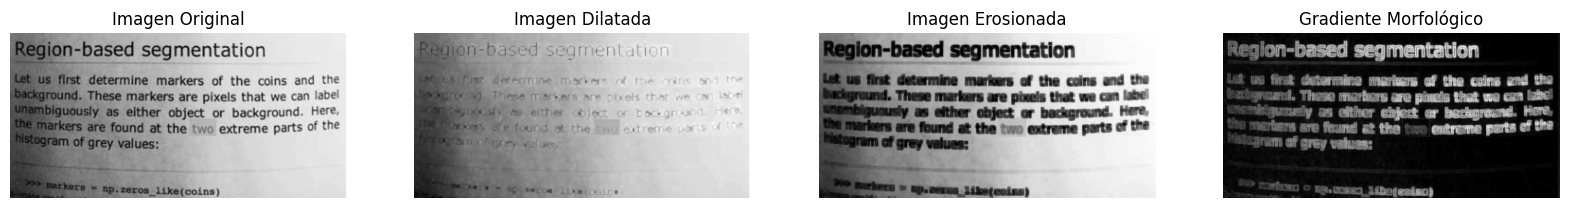

In [330]:
imagen = cv.imread('assets/document.png', cv.IMREAD_GRAYSCALE)
elemento_estructurante = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
imagen_dilatada = cv.dilate(imagen, elemento_estructurante)
imagen_erosionada = cv.erode(imagen, elemento_estructurante)
gradiente_morfologico = cv.subtract(imagen_dilatada, imagen_erosionada)
plot_image(imagen, imagen_dilatada, imagen_erosionada, gradiente_morfologico)

## 5. Sobre la imagen microscope.png, aplicar los siguientes pasos 

### a) Binarizar la imagen (si no está binarizada). 

In [331]:
image_path = 'assets/microscope.png'
image = plt.imread(image_path)
image_original = image

In [332]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

In [333]:
threshold = threshold_niblack(image, window_size=351, k=0.13)
binary = image > threshold
binary = (binary * 255).astype(np.uint8)

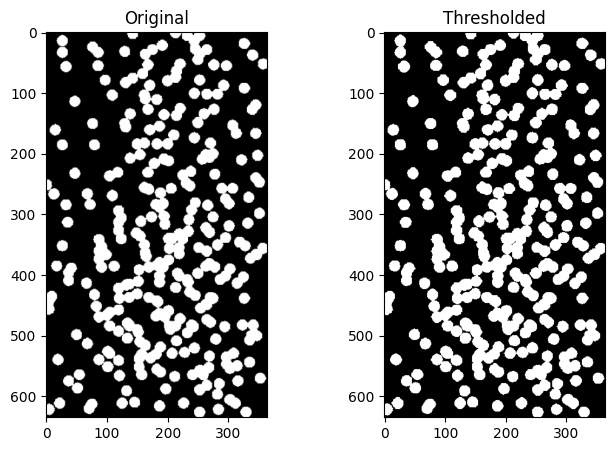

In [334]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title("Thresholded")
plt.show()

#### b) Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene? 

In [335]:
C, M = mo.label(binary, background=0, return_num=True, connectivity=2)

In [336]:
sizes = regionprops(C)
sizes = [s.area for s in sizes]

In [337]:
min_size = np.argmin(sizes)
print("Smallest component has", sizes[min_size], "pixels")

Smallest component has 167.0 pixels


### c) Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde sólo quede la mayor componente conexa. 

In [338]:
max_size = np.argmax(sizes)
binary_max_sixe = C == max_size + 1

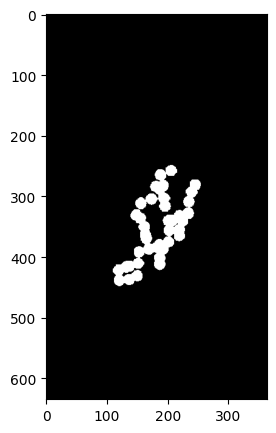

In [339]:
plt.figure(figsize=(8,5))
plt.imshow(binary_max_sixe, cmap='gray')
plt.show()

### d) Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el número verdadero de células? ¿Son iguales? 

In [340]:
disk = mo.disk(8)
binary = mo.binary_erosion(binary, disk)

In [341]:
C, M = mo.label(binary, background=0, return_num=True, connectivity=2)

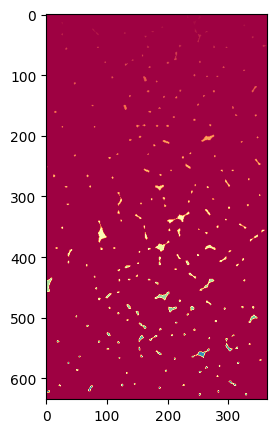

In [342]:
plt.figure(figsize=(8,5))
plt.imshow(C, plt.cm.Spectral)
plt.show()

In [343]:
print("Number of components:", M)

Number of components: 241


## 6. Para la imagen wheat.png, hacer lo siguiente 

### a) Segmentar la imagen de forma que se identifique de forma separada cada grano de trigo mediante el método de Watershed. 

#### Threshold con Niblack

In [344]:
image_path = 'assets/wheat.png'
image = plt.imread(image_path)
image_original = image

In [345]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

In [346]:
threshold = threshold_niblack(image, window_size=351, k=0.13)
binary = image > threshold
binary = (binary * 255).astype(np.uint8)

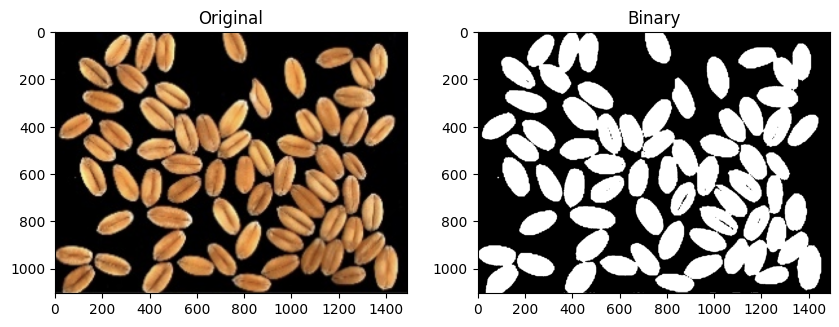

In [347]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title("Binary")
plt.show()

#### Operaciones morfológicas

In [348]:
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv.dilate(binary, kernel, iterations=3)

#### Watershed

In [349]:
distance = cv.distanceTransform(binary, cv.DIST_L2, 5)
_, sure_fg = cv.threshold(distance, 0.4 * distance.max(), 255, 0)

In [350]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

In [351]:
_, markers = cv.connectedComponents(sure_fg)
markers += 1 
markers[unknown == 255] = 0 

In [352]:
image_color = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

In [353]:
cv.watershed(image_color, markers)

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

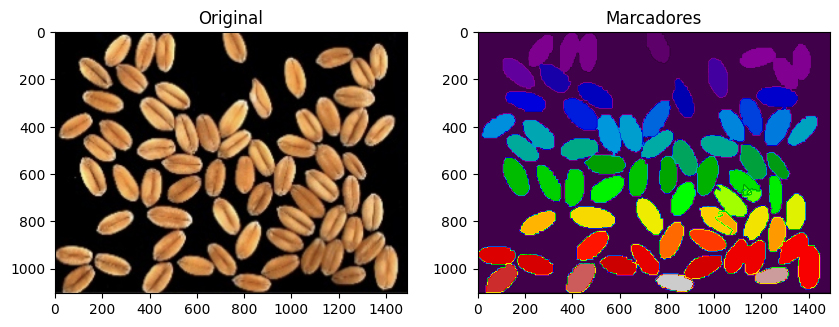

In [354]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='nipy_spectral')
plt.title("Marcadores")
plt.show()

### b) Construir el mapa de clases, pintando de color negro el fondo, y cada grano con un color distinto. 

In [355]:
unique_labels = np.unique(markers)
class_map = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)

In [356]:
for label in unique_labels:
    if label == 1: 
        class_map[markers == label] = [0, 0, 0]
    elif label > 1:
        color = np.random.randint(0, 255, size=(3,), dtype=np.uint8)
        class_map[markers == label] = color

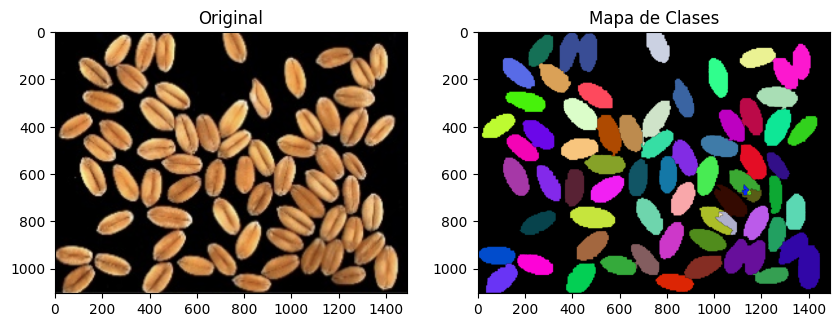

In [357]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(class_map)
plt.title("Mapa de Clases")
plt.show()

### c) Combinar la imagen original con una versión pálida del mapa de colores (modifique el canal α del mapa de clases y súmelo con la imagen original), para mostrar los colores obtenidos en el mapa de clases sobre cada grano. 

In [358]:
image_original_color = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
alpha = 0.5 
overlay = cv.addWeighted(image_original_color, 1 - alpha, class_map, alpha, 0)

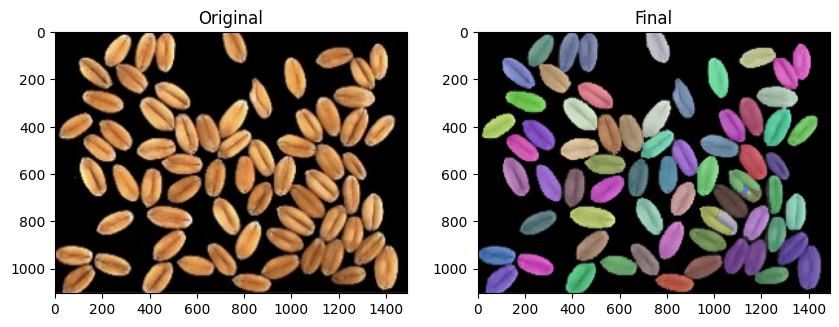

In [359]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Final")
plt.show()